<!-- Kommentare sind moeglich mit HTML Kommentaren
<!-- Based on knitr-minimal.Rmd on http://yihui.name/knitr/demo/minimal/ -->

# MRI-Together 2021-https://mritogether.github.io/

## A White Hat’s Guide to P-Hacking

### Dr. Xeni Deligianni- University of Basel-xeni.deligianni@unibas.ch

## This tutorial is released under a CC-BY license.

We have two data distributions, one the **controls** and one a distribution that we want to compare to the control.
In real scientific life this could be the quantitative values of a controlled group, let's call them **qmr** and
respective values of a different group e.g. patients with a certain condition.

Let's assume for now that the distributions are **normal** Gaussian distributions. So let's assume we checked the distributions.
And let' s assume, that BEFORE starting our analysis, we have a **hypothesis** that in disease presence T42 values are increased.
And let's imagine we have estimated that we should measure and we measured under identical and ideal conditions **50 healthy controls** and **50 patients**.

## Let' s agree on some definitions first

**$\alpha$**: Significance level.A p-value below this will lead to the null hypothesis being rejected.

## Ready? Let's create some fictional data. 

Let's create two perfectly **normal distributions**. One with **mean** 40 and **standard deviation** (sd) 5 and one with mean 10 and standard deviation 2. 
And let's visualize at their distributions, as well as the distribution of their difference.


Loading required package: viridisLite



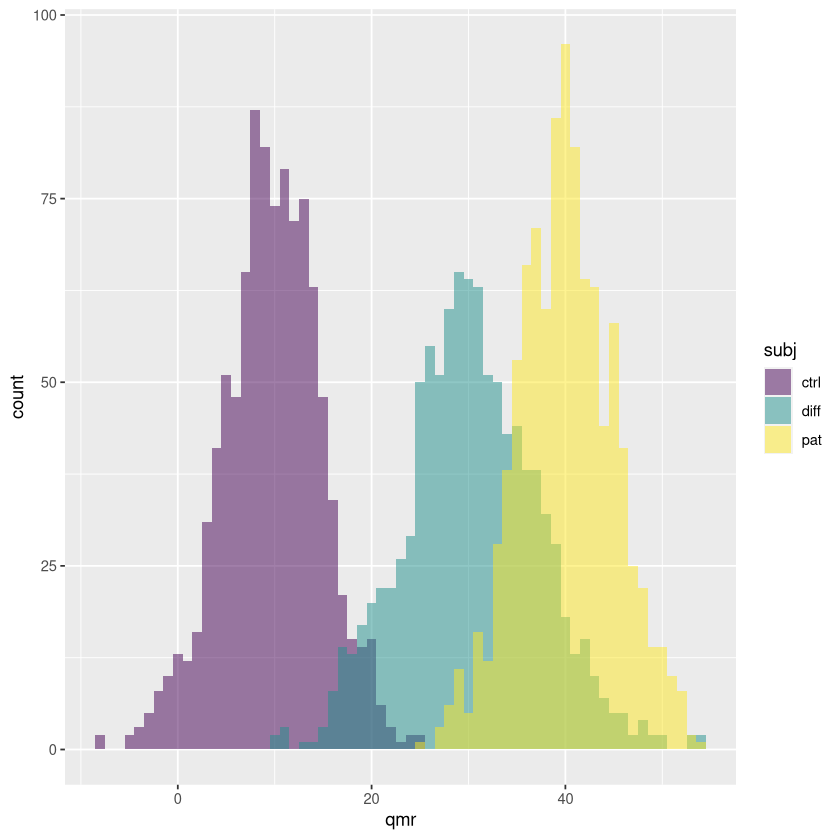

In [1]:
library(ggplot2)# A great library for visualization
library(viridis)#colorblind accessible

#qmr <-c(rnorm(1000, mean=10, sd=5),rnorm(1000, mean=40, sd=5))
#qmr<-c(qmr,qmr[1001:2000]-qmr[1:1000])
load('New_Data.RData')
subj <- as.factor(c(rep("ctrl",1000),rep("pat",1000),rep("diff",1000)))
d.exp <- data.frame(qmr,subj)

x_p<-d.exp[d.exp$subj=='pat',]$qmr
bw_p <- 2 * IQR(x_p) / length(x_p)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
x_c<-d.exp[d.exp$subj=='ctrl',]$qmr
bw_c <- 2 * IQR(x_c) / length(x_c)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule

ggplot(d.exp,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 1,alpha=0.5,position='identity')+scale_fill_viridis_d()


## That looks clear. Doesn't it? Let's also look at the boxplot visualization.



In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)
load('New_Data.RData')
#qmr <-c(rnorm(1000, mean=10, sd=5),rnorm(1000, mean=40, sd=5))
#subj <- c(rep("ctrl",1000),rep("pat",1000),rep("diff",1000))
#d.exp <- data.frame(qmr,subj)
x<-d.exp[d.exp$subj=='pat',]$qmr
bw <- 2 * IQR(x) / length(x)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
ggplot(data = d.exp,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()
#colorblind accessible colors


## So what's next? How likely is that this difference is 0.  
What would we get by testing whether there is a difference in these 2 distributions. 
Having all our assumptions, most of us would go for a t-test.


In [ ]:
load('New_Data.RData')

#qmr <-c(rnorm(1000, mean=10, sd=5),rnorm(1000, mean=40, sd=5))
#subj <- c(rep("ctrl",1000),rep("pat",1000),rep("diff",1000))
#d.exp <- data.frame(qmr,subj)
# Randomly choose number of samples (1000/50/25/15/5)

nr_s<-4

p_series<-vector()
for (i in 1:100) {
  sample_rows_ctrl<-sample(nrow(d.exp[d.exp$subj=="ctrl",]),nr_s)
  sample_rows_pat<-1000+sample(nrow(d.exp[d.exp$subj=="pat",]),nr_s)
  d.exp_sub<-rbind(d.exp[sample_rows_ctrl,],d.exp[sample_rows_pat,])
  p_Res<-t.test(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr, paired = FALSE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)
  p_series [i]<-p_Res$p.value
}
plot(p_series,ylim=c(0,0.06))
abline(h=0.05)



###So let's sum up and continue


In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)
library(ggpubr)
load('New_Data_sub.RData')

####### Histograms
x_p<-d.exp_sub[d.exp_sub$subj=='pat',]$qmr
bw_p <- 2 * IQR(x) / length(x)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
x_c<-d.exp_sub[d.exp_sub$subj=='ctrl',]$qmr
bw_c <- 2 * IQR(x) / length(x)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule

####### Histograms
a<-ggplot(d.exp_sub,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = bw_p,alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp_sub[d.exp_sub$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = bw_p,alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data = d.exp_sub,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()

ggarrange(a, b,c, labels = c("A","B","C"),
                    ncol = 2, nrow = 2)
#### t-test
t.test(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)


### But what if we don't have 1000 samples or 1000 representative samples?

## **Trap Nr. 1**: Be real! 5 data points is not 5000
Topic 1: The number of samples is important
What if we have 15 samples of some less different data. Let's get them & repeat the steps

p-values change but our difference is still constantly higher than 0. 
## But what if things are not so clear?
Let's modify bring the mean values closer and increase the standard deviation.
Keeping the assumptions for t-test we keep standard deviation the same.


In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)
library(ggpubr)
library(effsize)
# Randomly choose number of samples (1000/50/25/15/5) 
nr_s<-5#TRY TO CHANGE THIS NUMBER
#Later you can also go ahead and modify the mean values and study the effect
qmr <-c(rnorm(nr_s, mean=25.5, sd=10),rnorm(nr_s, mean=34.2, sd=10))
qmr<-c(qmr,qmr[1:nr_s]-qmr[(nr_s+1):(2*nr_s)])
subj <- c(rep('ctrl',nr_s),rep('pat',nr_s),rep("diff",nr_s))
d.exp <- data.frame(qmr,subj)
####### Histograms
x_p<-d.exp[d.exp$subj=='pat',]$qmr
bw_p <- 2 * IQR(x_p) / length(x_p)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
x_c<-d.exp[d.exp$subj=='ctrl',]$qmr
bw_c <- 2 * IQR(x_c) / length(x_c)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule

####### Histograms
a<-ggplot(d.exp,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp[d.exp$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data = d.exp,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

ggarrange(a, b,c, labels = c("A","B","C"),
                    ncol = 2, nrow = 2)
#### t-test
t.test(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)

cohen.d(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr)


In [ ]:
library(effsize)
load('Difficult_Data.RData')
nr_s<-5

p_series<-vector()
cohenD<-vector()
for (i in 1:500) {
  sample_rows_ctrl<-sample(nrow(d.exp[d.exp$subj=="ctrl",]),nr_s)
  sample_rows_pat<-1000+sample(nrow(d.exp[d.exp$subj=="pat",]),nr_s)
  d.exp_sub<-rbind(d.exp[sample_rows_ctrl,],d.exp[sample_rows_pat,])
  p_Res<-t.test(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)
  rcohen<-cohen.d(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr)
  p_series [i]<-p_Res$p.value
  cohenD[i]<-rcohen$estimate
}
par(mfrow=c(2,2))
plot(p_series,ylim=c(0,1))
abline(h=0.05,col="red")
hist(p_series,breaks=30)
abline(v=0.05,col="red")
plot(cohenD)


### What can we do?

Decide in advance the sample size we need! If we don' t know maybe it is an exploratory analysis after all

###Clinical vs statistical significance (to the slides and back)

## **Trap Nr. 2**: Step 1: Look at your data

### Not all datasets are normal, t-test is not for everything!
The same way as mean is not always the proper statistic.


In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)
library(ggpubr)
library(effsize)
# Randomly choose 50/25/15/5 samples
nr_s<-1000
# Generate a random negative binomial distribution
qmr <-c(15+250*rexp(1000,25),35-250*rexp(1000,25))
qmr<-c(qmr,qmr[1:nr_s]-qmr[(nr_s+1):(2*nr_s)])
subj <- c(rep('ctrl',nr_s),rep('pat',nr_s),rep("diff",nr_s))
d.exp <- data.frame(qmr,subj)
####### Histograms
x_p<-d.exp[d.exp$subj=='pat',]$qmr
bw_p <- 2 * IQR(x_p) / length(x_p)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
x_c<-d.exp[d.exp$subj=='ctrl',]$qmr
bw_c <- 2 * IQR(x_c) / length(x_c)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule

####### Histograms
a<-ggplot(d.exp,aes(x=qmr,fill =subj)) + 
  geom_histogram(alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp[d.exp$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data = d.exp,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

ggarrange(a, b,c, labels = c("A","B","C"),
                    ncol = 2, nrow = 2)
#### t-test
t.test(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95)
wilcox.test(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr, paired = TRUE,alternative = "two.sided")


In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)
library(ggpubr)
library(effsize)
# Randomly choose number of samples (1000/50/25/15/5) 
nr_s<-10
#Later you can also go ahead and modify the mean values and study the effect
qmr <-c(rnorm(nr_s, mean=25, sd=8),rnorm(nr_s, mean=35, sd=8))
qmr<-c(qmr,qmr[1:nr_s]-qmr[(nr_s+1):(2*nr_s)])
subj <- c(rep('ctrl',nr_s),rep('pat',nr_s),rep("diff",nr_s))
d.exp <- data.frame(qmr,subj)
####### Histograms
x_p<-d.exp[d.exp$subj=='pat',]$qmr
bw_p <- 2 * IQR(x_p) / length(x_p)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule
x_c<-d.exp[d.exp$subj=='ctrl',]$qmr
bw_c <- 2 * IQR(x_c) / length(x_c)^(1/3)#decide for the nr of bins-Friedman-Diaconis rule

####### Histograms
a<-ggplot(d.exp,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp[d.exp$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data = d.exp,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

ggarrange(a, b,c, labels = c("A","B","C"),
                    ncol = 2, nrow = 2)
#### t-test
t.test(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)

cohen.d(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr)


In [ ]:
load('Not_normal_Distr.RData')
nr_s<-4

p_series<-vector()
cohenD<-vector()
for (i in 1:500) {
  sample_rows_ctrl<-sample(nrow(d.exp[d.exp$subj=="ctrl",]),nr_s)
  sample_rows_pat<-1000+sample(nrow(d.exp[d.exp$subj=="pat",]),nr_s)
  d.exp_sub<-rbind(d.exp[sample_rows_ctrl,],d.exp[sample_rows_pat,])
  p_Res<-t.test(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr, paired = FALSE,
alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
  rcohen<-cohen.d(d.exp_sub[d.exp_sub$subj=="pat",]$qmr, d.exp_sub[d.exp_sub$subj=="ctrl",]$qmr)
  p_series [i]<-p_Res$p.value
  cohenD[i]<-rcohen$estimate
}
par(mfrow=c(2,2))
plot(p_series,ylim=c(0,1))
abline(h=0.05,col="red")
hist(p_series,breaks=30)
abline(v=0.05,col="red")
plot(cohenD)


### Trap 3: Just one more experiment then!It almost looks good. Let's repeat it. Trap of adding data on marginal distributions. 


In [ ]:
load('Adding_values.RData')
d.extra<-d.exp_s

d.exp_w_Points<-rbind(d.exp_limit,data.frame(qmr=18,subj="ctrl"),data.frame(qmr=40,subj="pat"))

a<-ggplot(d.exp_w_Points,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp_w_Points[d.exp_w_Points$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data =d.exp_w_Points,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

d<-ggplot(data =d.exp_limit,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

ggarrange(a, b,c, d,labels = c("A","B","C","D"),
                    ncol = 2, nrow = 2)

res_w_Points<-t.test(d.exp_w_Points[d.exp_w_Points$subj=="pat",]$qmr, d.exp_w_Points[d.exp_w_Points$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)
res_wo_Points<-t.test(d.exp_limit[d.exp_limit$subj=="pat",]$qmr, d.exp_limit[d.exp_limit$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)


## **Trap Nr. 3**: This one looks wrong. Let's remove it
##TO DO:post-hoc data selection, Keep adjusting the data collection removing outliers, 1) use different threshold, 2) remove outliers and test till you get you result


In [ ]:
load('Removing_values.RData')
a<-ggplot(d.exp_w_Outl,aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
b<-ggplot(d.exp_w_Outl[d.exp_w_Outl$subj=="diff",],aes(x=qmr,fill =subj)) + 
  geom_histogram(binwidth = 3,alpha=0.5,position='identity')+scale_fill_viridis_d()
####### Boxplots
c<-ggplot(data =d.exp_w_Outl,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

d<-ggplot(data =d.exp,mapping = aes(y = qmr,x = subj, fill=subj)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()

ggarrange(a, b,c, d,labels = c("A","B","C","D"),
                    ncol = 2, nrow = 2)

d.extra<-d.exp_w_Outl

#t.test(d.exp_limit[d.exp_limit$subj=="pat",]$qmr, d.exp_limit[d.exp_limit$subj=="ctrl",]$qmr, paired = TRUE,
#alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)
 
res_wo_Outlier<-t.test(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr, paired = FALSE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)

res_w_Outlier<-t.test(d.exp_w_Outl[d.exp_w_Outl$subj=="pat",]$qmr, d.exp_w_Outl[d.exp_w_Outl$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)


## **Trap Nr. 4**: Problem of repeated sequential testing
### Bonferroni and other corrections


In [ ]:
library(ggplot2)# A great library for visualization
library(viridis)#For the colormap
library(ggpubr)#For multiple subplots in ggplot
library(effsize)
# Randomly choose number of samples (1000/50/25/15/5) 
#nr_s<-15
#sample_rows<-sample(nrow(iris),nr_s)
#d.subiris<-iris[sample_rows,]
load('Subiris.RData')
#Later you can also go ahead and modify all values and study the effect
#Let's assume I measured 8 different parameters
#Here we will use a default r dataset
library(datasets)
data("iris")
summary(iris)

### Boxplots
a<-ggplot(data = d.subiris,mapping = aes(y = Sepal.Length,x = Species, fill=Species)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()
b<-ggplot(data = d.subiris,mapping = aes(y = Sepal.Width,x = Species, fill=Species)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()
c<-ggplot(data = d.subiris,mapping = aes(y = Petal.Length,x = Species, fill= Species)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()
d<-ggplot(data = d.subiris,mapping = aes(y = Petal.Width,x = Species, fill=Species)) + geom_boxplot()+scale_fill_viridis_d()+geom_point()
#######
ggarrange(a,b,c,d, labels = c("A","B","C","D"),
          ncol = 2, nrow = 2)
#cohen.d(d.exp[d.exp$subj=="pat",]$qmr, d.exp[d.exp$subj=="ctrl",]$qmr)


In [ ]:
load('Subiris.RData')
#### t-test
#res.1<-t.test(d.subiris[d.subiris$Species=="setosa",]$Petal.Length, d.subiris[d.subiris$Species=="versicolor",]$Petal.Length, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.2<-t.test(d.subiris[d.subiris$Species=="setosa",]$Petal.Width, d.subiris[d.subiris$Species=="versicolor",]$Petal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.3<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Width, d.subiris[d.subiris$Species=="versicolor",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.4<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Length, d.subiris[d.subiris$Species=="versicolor",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.5<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width,paired=FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.6<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.7<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.8<-t.test(d.subiris[d.subiris$Species=="setosa",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.9<-t.test(d.subiris[d.subiris$Species=="versicolor",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.10<-t.test(d.subiris[d.subiris$Species=="versicolor",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.11<-t.test(d.subiris[d.subiris$Species=="versicolor",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
#res.12<-t.test(d.subiris[d.subiris$Species=="versicolor",]$Sepal.Length, d.subiris[d.subiris$Species=="virginica",]$Sepal.Width, paired = FALSE,
#alternative = "two.sided", conf.level = 0.95,var.equal=FALSE)
p_no_corr<-(c(res.1$p.value,res.2$p.value,res.3$p.value,res.4$p.value,res.5$p.value,res.6$p.value,res.7$p.value,res.8$p.value,res.9$p.value,res.10$p.value,res.11$p.value,res.12$p.value))
p_adjusted<-p.adjust(p_no_corr, method = "bonferroni", n = length(p_no_corr))

plot(p_no_corr,ylim=c(0,1.2))
lines(p_adjusted,lty=2)


## **Trap Nr. 5**: TODO POST HOC hypothesis
### Be ware of one-sided tests,

###Check the assumptions: (different variation, reaching normality)


In [ ]:
load('Adding_values.RData')
res1<-t.test(d.exp_limit[d.exp_limit$subj=="pat",]$qmr, d.exp_limit[d.exp_limit$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "two.sided", conf.level = 0.95,var.equal=TRUE)
res2<-t.test(d.exp_limit[d.exp_limit$subj=="pat",]$qmr, d.exp_limit[d.exp_limit$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "less", conf.level = 0.95,var.equal=TRUE)
res3<-t.test(d.exp_limit[d.exp_limit$subj=="pat",]$qmr, d.exp_limit[d.exp_limit$subj=="ctrl",]$qmr, paired = TRUE,
alternative = "greater", conf.level = 0.95,var.equal=TRUE)

c(res1$p.value,res2$p.value,res3$p.value)


##References
https://www.youtube.com/watch?v=HDCOUXE3HMM
Cambell book             
##how to hack tutorial nicolas


In [ ]:
## set global chunk options: all images will be 7x5 inches
knitr::opts_chunk$set(fig.width = 7, fig.height = 5)
options(digits = 4)


I encourage you to watch:
The dance of p-values: https://www.youtube.com/watch?v=5OL1RqHrZQ8
by Geoff Cumming who is also a presenter
